In [1]:
import pandas as pd

In [9]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [10]:
train = train.drop(["Cabin","Ticket", "Name"], axis=1)
test = test.drop(["Cabin", "Ticket", "Name"], axis=1)

In [22]:
mask = train["Embarked"].isnull()
train = train.drop(train.index[mask])

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [28]:
num_col = ["PassengerId", "SibSp", "Parch", "Fare", "Age"]
cat_col = ["Survived", "Pclass", "Sex", "Embarked"]

In [15]:
print(len(num_col), len(cat_col))

5 4


In [13]:
for col in cat_col:
    train[col] = train[col].astype("category")

In [14]:
train.dtypes

PassengerId       int64
Survived       category
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

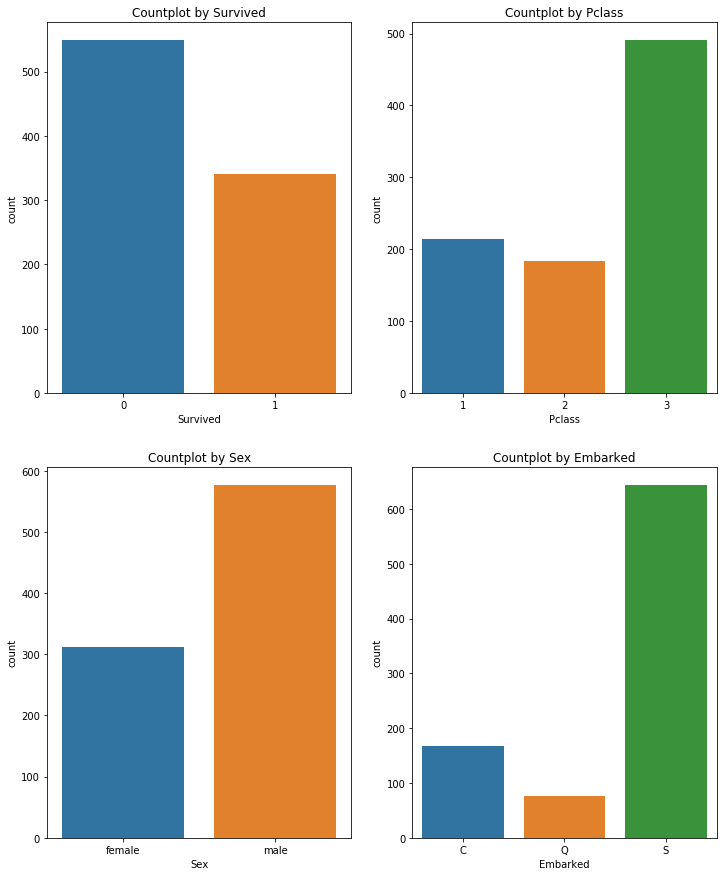

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# category column visualize
fig, axes = plt.subplots(2, 2, figsize=(12,15))
axes = axes.flatten()

for col, ax in zip(cat_col, axes):
    sns.countplot(data = train, x = col, ax = ax)
    ax.set_title("Countplot by " + col)

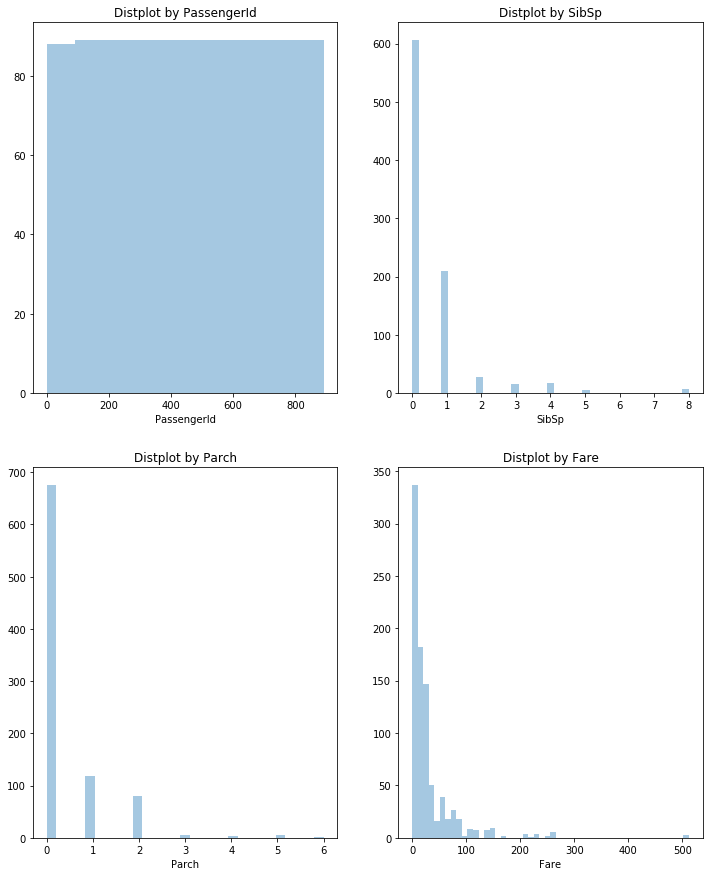

In [32]:
# numerical column visualize
fig, axes = plt.subplots(2, 2, figsize=(12,15))
axes = axes.flatten()

for col, ax in zip(num_col, axes):
    sns.distplot(train[col], ax = ax, kde=False)
    ax.set_title("Distplot by " + col)

Text(0.5,1,'Distplot by Age')

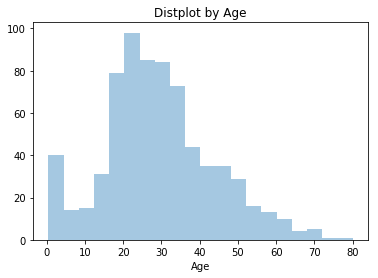

In [44]:
sns.distplot(train["Age"][-train["Age"].isnull()], kde = False).set_title("Distplot by Age")

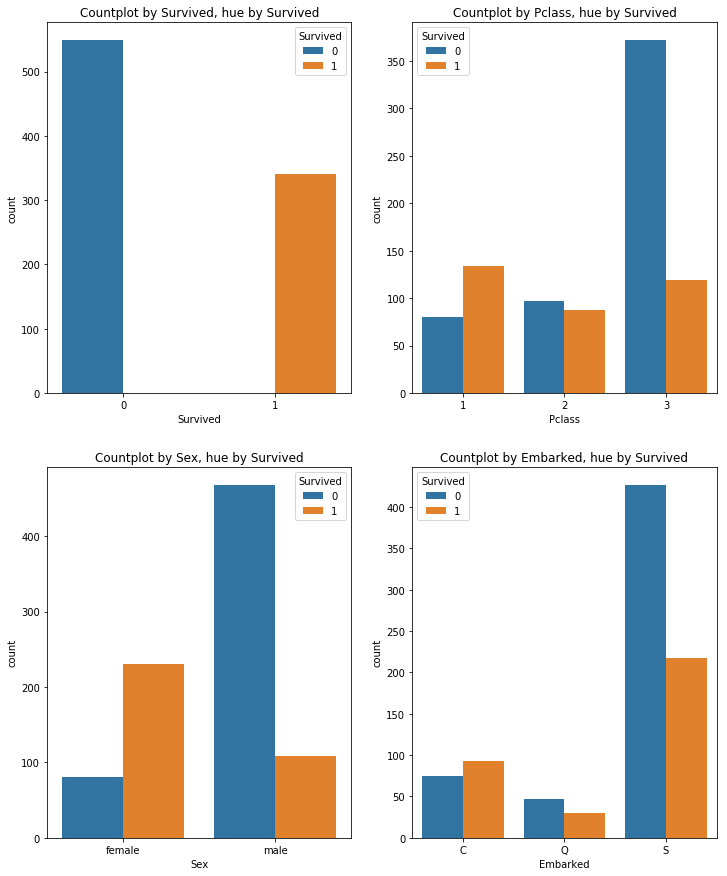

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(12,15))
axes = axes.flatten()

for col, ax in zip(cat_col, axes):
    sns.countplot(data = train, x = col, ax = ax, hue="Survived")
    ax.set_title("Countplot by " + col + ", hue by Survived")

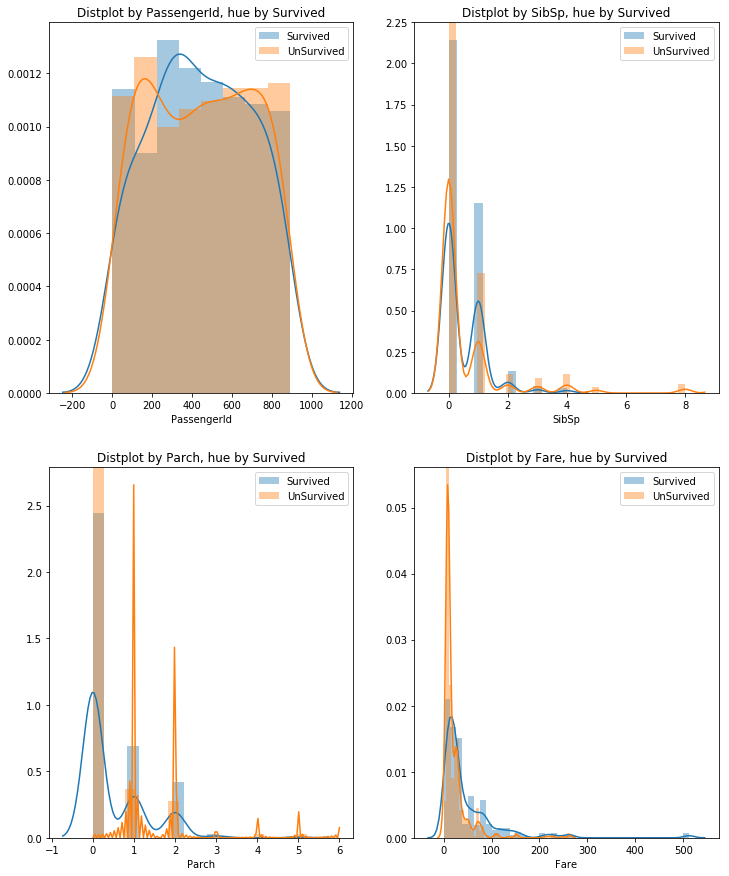

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(12,15))
axes = axes.flatten()

for col, ax in zip(num_col, axes):
    sns.distplot(train[train["Survived"] == 1][col], ax = ax, kde=True, label="Survived")
    sns.distplot(train[train["Survived"] == 0][col], ax = ax, kde=True, label="UnSurvived")
    ax.legend()
    ax.set_title("Distplot by " + col + ", hue by Survived")

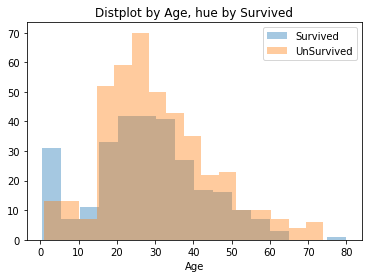

In [94]:
sns.distplot(train["Age"][(-train["Age"].isnull()) & (train["Survived"] == 1)], kde = False, label="Survived").set_title("Distplot by Age, hue by Survived")
sns.distplot(train["Age"][(-train["Age"].isnull()) & (train["Survived"] == 0)], kde = False, label="UnSurvived").legend()

# 20180919
일변수 이변수 시각화했고,
범주형은 독립성검정, 수치형은 t검정?
age어떻게 할 건지